In [1]:
import pandas as pd


In [2]:
RTH = pd.read_csv('RTHpandas.csv')

In [3]:
RTH.columns

Index(['RO-NO...\n', 'BOOKED.\nDATE', 'CLOSED.\nDATE', 'DT\n', 'TECH...\nNO',
       'LN\n', 'SEQ\nNO', 'M\n', 'HT\n', 'SC\n', 'LBR..\nTYPE', 'PAY.\nTYPE',
       'ACTUAL.\nHOURS', 'SOLD...\nHOURS', 'SOLD......\nAMOUNT',
       'LABOR.....\nCOST', 'OP-CODE...\n', 'DESCRIPTION..\n', 'Unnamed: 18'],
      dtype='object')

In [7]:
df = RTH.dropna()

In [9]:
df.columns


Index(['RO-NO...\n', 'BOOKED.\nDATE', 'CLOSED.\nDATE', 'DT\n', 'TECH...\nNO',
       'LN\n', 'SEQ\nNO', 'M\n', 'HT\n', 'SC\n', 'LBR..\nTYPE', 'PAY.\nTYPE',
       'ACTUAL.\nHOURS', 'SOLD...\nHOURS', 'SOLD......\nAMOUNT',
       'LABOR.....\nCOST', 'OP-CODE...\n', 'DESCRIPTION..\n', 'Unnamed: 18'],
      dtype='object')

In [10]:
df.head()

,RO-NO...\n,BOOKED.\nDATE,CLOSED.\nDATE,DT\n,TECH...\nNO,LN\n,SEQ\nNO,M\n,HT\n,SC\n,LBR..\nTYPE,PAY.\nTYPE,ACTUAL.\nHOURS,SOLD...\nHOURS,SOLD......\nAMOUNT,LABOR.....\nCOST,OP-CODE...\n,DESCRIPTION..\n,Unnamed: 18
0,162308,19FEB21,26FEB21,S1,99999,H,9,,ST,,ISM,ROP,0.0,0.0,0.00,0,BRAKES,DECLINED REPA,\r
2,162308,19FEB21,26FEB21,S1,99999,I,10,,ST,,ISM,ROP,0.0,0.0,0.00,0,MISC,DECLINED REPA,\r
4,162308,19FEB21,26FEB21,S1,99999,J,11,,ST,,ISD,ROP,0.0,0.0,212.31,0,UCD,RUDYS EXPRESS,\r
6,163279,01MAR21,04MAR21,S1,99999,B,2,,ST,,CSR,ROP,0.0,0.0,0.00,0,MISC,CUSTOMER JUST,\r
8,163279,01MAR21,04MAR21,S1,99999,C,3,,ST,,ISM,ROP,0.0,0.0,0.00,0,LOANER,LOANER VEHICL,\r


In [15]:
Renamed_df = df.rename(columns={'RO-NO...\n':'RO_NO','BOOKED.\nDATE':'BOOKED', 'CLOSED.\nDATE': 'CLOSED_DATE',\
                    'TECH...\nNO':'TECH_NO','LN\n':'LINE','LBR..\nTYPE':'LABOR_TYPE',\
                    'ACTUAL.\nHOURS':'ACTUAL_HOURS', 'SOLD...\nHOURS':'SOLD-HOURS',\
                    'OP-CODE...\n':'OP_CODE', 'DESCRIPTION..\n':'DESCRIPTION'})

In [16]:
Scrubed_RTH = Renamed_df[['RO_NO','BOOKED','CLOSED_DATE',\
                    'TECH_NO','LINE','LABOR_TYPE','ACTUAL_HOURS','SOLD-HOURS',\
                    'OP_CODE','DESCRIPTION']]

In [17]:
Scrubed_RTH.head()

,RO_NO,BOOKED,CLOSED_DATE,TECH_NO,LINE,LABOR_TYPE,ACTUAL_HOURS,SOLD-HOURS,OP_CODE,DESCRIPTION
0,162308,19FEB21,26FEB21,99999,H,ISM,0.0,0.0,BRAKES,DECLINED REPA
2,162308,19FEB21,26FEB21,99999,I,ISM,0.0,0.0,MISC,DECLINED REPA
4,162308,19FEB21,26FEB21,99999,J,ISD,0.0,0.0,UCD,RUDYS EXPRESS
6,163279,01MAR21,04MAR21,99999,B,CSR,0.0,0.0,MISC,CUSTOMER JUST
8,163279,01MAR21,04MAR21,99999,C,ISM,0.0,0.0,LOANER,LOANER VEHICL


In [64]:
df = Scrubed_RTH.groupby('TECH_NO')['SOLD-HOURS'].sum()
df2 = pd.DataFrame(df)
df3 = df2.reset_index(inplace=False)
df3
tech_list = df3['TECH_NO']
tech_list
techlist = []
for tech in tech_list:
    techlist.append(tech)
    
techlist

['        ',
 '     ***',
 '  3   ST',
 '  4   ST',
 '165515',
 '178894',
 '188507',
 '197655',
 '198467',
 '199431',
 '199678',
 '201138',
 '203659',
 '204777',
 '205155',
 '206080',
 '207992',
 '209113',
 '209725',
 '210186',
 '210630',
 '211250',
 '211273',
 '226497',
 '229209',
 '229933',
 '238941',
 '238987',
 '239080',
 '239669',
 '239726',
 '99999']

In [76]:
active = df3.iloc[4:30,:]

In [83]:
active
newactive = active.reset_index()
newactive.

Index(['index', 'TECH_NO', 'SOLD-HOURS'], dtype='object')

In [92]:
newactive

,TECH_NO,SOLD-HOURS
0,165515,661.23
1,178894,767.34
2,188507,598.60
3,197655,24.70
4,198467,173.68
5,199431,681.01
6,199678,270.04
7,201138,713.60
8,203659,604.59
9,204777,412.75


<AxesSubplot:xlabel='TECH_NO'>

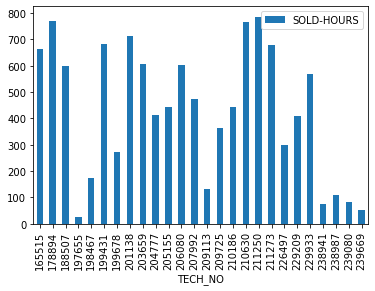

In [115]:
newactive.plot(kind='bar', x='TECH_NO')
sort_columns